sunlight < 7: 
- production decrease by 4% for every 10m (138.89 timestamps)

humidity: ideal 60-80%
- production decrease by 2% for every 5% deviation

0.1 seashell per orchid per timestamp for storage

Summarizing trading microstructure of ORCHIDs:
- ConversionObservation (https://imc-prosperity.notion.site/Writing-an-Algorithm-in-Python-658e233a26e24510bfccf0b1df647858#44efb36257b94733887ae00f46a805f1) shows quotes of ORCHID offered by the ducks from South Archipelago
- If you want to purchase 1 unit of ORCHID from the south, you will purchase at the askPrice, pay the TRANSPORT_FEES, IMPORT_TARIFF 
- If you want to sell 1 unit of ORCHID to the south, you will sell at the bidPrice, pay the TRANSPORT_FEES, EXPORT_TARIFF
- You can ONLY trade with the south via the conversion request with applicable conditions as mentioned in the wiki
- For every 1 unit of ORCHID net long position you hold, you will pay 0.1 Seashells per timestamp you hold that position. No storage cost applicable to net short position
- Negative ImportTariff would mean you would receive premium for importing ORCHIDs to your island
- Each Day in ORCHID trading is equivalent to 12 hours on the island. You can assume the ORCHID quality doesn’t deteriorate overnight
- Sunlight unit: Average sunlight per hour is 2500 units. The data/plot shows instantaneous rate of sunlight on any moment of the day

- 1 timestamp = 4.32 seconds

<Axes: >

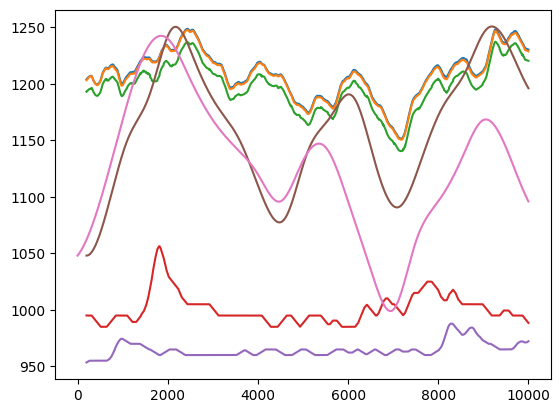

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('d1.csv', sep=';')
df = df.reset_index(drop=True)
df = df.drop('timestamp', axis=1)

# moving average
df['ORCHIDS'] = df['ORCHIDS'].rolling(window=200).mean()
buyCost = []
for i in range(0, len(df)):
    buyCost.append(df['ORCHIDS'][i] + df['IMPORT_TARIFF'][i] + df['TRANSPORT_FEES'][i])
df['BUY_COST'] = buyCost

sellRev = []
for i in range(0, len(df)):
    sellRev.append(df['ORCHIDS'][i] - df['EXPORT_TARIFF'][i] - df['TRANSPORT_FEES'][i])
df['SELL_COST'] = sellRev

df['ORCHIDS'].plot()
df['BUY_COST'].plot()
df['SELL_COST'].plot()
(df['EXPORT_TARIFF']*10+900).rolling(window=200).mean().plot()
(-df['IMPORT_TARIFF']*25+900).rolling(window=200).mean().plot()
(df['SUNLIGHT']/10 + 800).rolling(window=200).mean().plot()
(df['HUMIDITY'] * 12 + 100).plot()

# (df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']).plot()


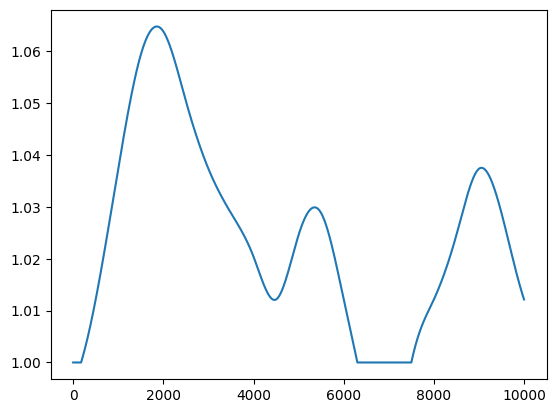

In [2]:
effect = []
for i in range(0, len(df)):
    if df['HUMIDITY'][i] <= 80 and df['HUMIDITY'][i] >= 60:
        effect.append(1)
    elif df['HUMIDITY'][i] < 60:
        effect.append(1 - 0.02 * ((60 - df['HUMIDITY'][i]) / 5))
    else:
        effect.append(1 - 0.02 * ((df['HUMIDITY'][i] - 80) / 5))
        
for i in range(0, len(df)):
    effect[i] = 1 / effect[i]
    
df['EFFECT'] = effect
df['EFFECT'].plot()
# df['EXPORT_TARIFF'].plot()
# (-df['IMPORT_TARIFF']*5).plot()
df['epi'] = df['EXPORT_TARIFF'] - df['IMPORT_TARIFF'] + 10 * df['TRANSPORT_FEES']


<Axes: >

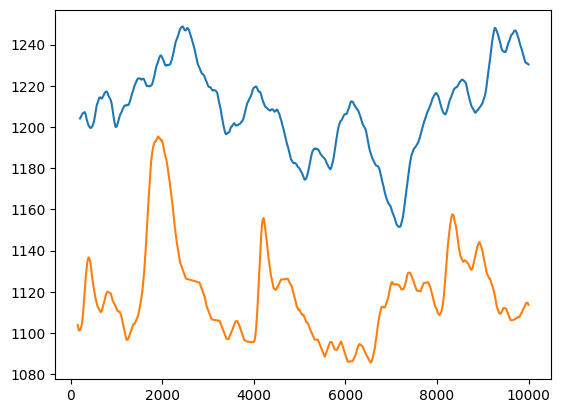

In [3]:
df['ORCHIDS'].plot()
df['epi'] = df['epi'] * df['EFFECT']
(df['epi']*8+900).rolling(window=150).mean().plot()
# (df['SUNLIGHT'].diff() * 100 + 1100).plot()

<Axes: >

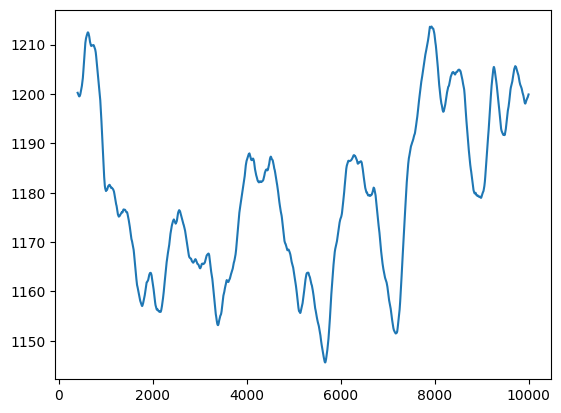

In [4]:
df['EFFECT'] = df['EFFECT'].shift(400)
#df['EXPORT_TARIFF'].rolling(window=200).mean().plot()
df['ORCHIDS'] = df['ORCHIDS'] / df['EFFECT']
df['ORCHIDS'].plot()

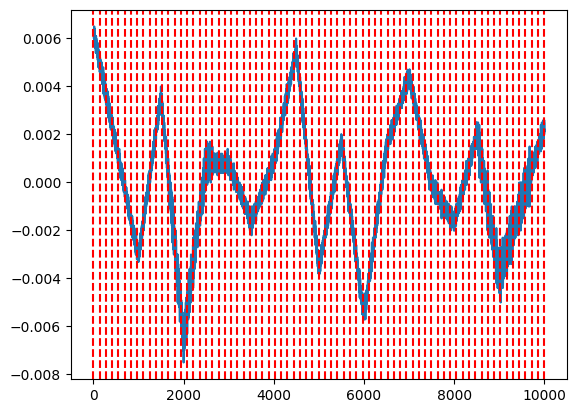

In [5]:
df['SUNLIGHT'].diff().diff().plot()
for i in range(0, 12*6+1):
    plt.axvline(x=i*833/6, color='r', linestyle='--')

<Axes: >

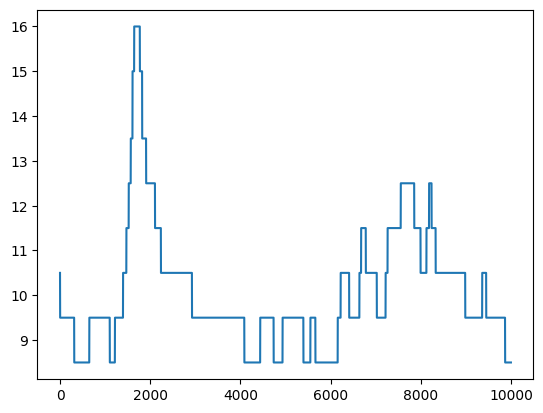

In [6]:
df['EXPORT_TARIFF'].plot()